In [1]:
import pandas as pd
import matplotlib.pyplot as plt

datasetList = ['UNSW2016', 'UNSW2018', 'NEUSI2019', 
               'NEUKI2019', 'NCSU2020', 'NCSU2021', 'IOTBEHAV2021', 
               'HomeSnitch2021', 'UNB2021']
#'YT1803', 'YT1804', 
datasetList1 = ['UNSW2016', 'IOTBEHAV2021']
results = {
    'burstiot':{},
    'popets':{},
    'byteiot':{}
} 

metricList = ['Recall', 'Precision', 'Accuracy', 'F1']

burstiotDf = pd.read_csv("E:/Thesis/BurstIoT/Comparision/result/burstiot-result.csv")
popetsDf = pd.read_csv("E:/Thesis/BurstIoT/Comparision/result/popets-result.csv")
byteiotDf = pd.read_csv("E:/Thesis/BurstIoT/Comparision/result/byteiot-result.csv")

datasetDfList = {'burstiot':burstiotDf, 'popets':popetsDf, 'byteiot':byteiotDf}

for methodName, df in datasetDfList.items():
    for datasetName in datasetList:
        results[methodName][datasetName] = {}
        for metric in metricList:
            try:
                results[methodName][datasetName][metric] = df[df['DatasetName']==datasetName][metric].values[0]
            except:
                results[methodName][datasetName][metric] = 0.0
            


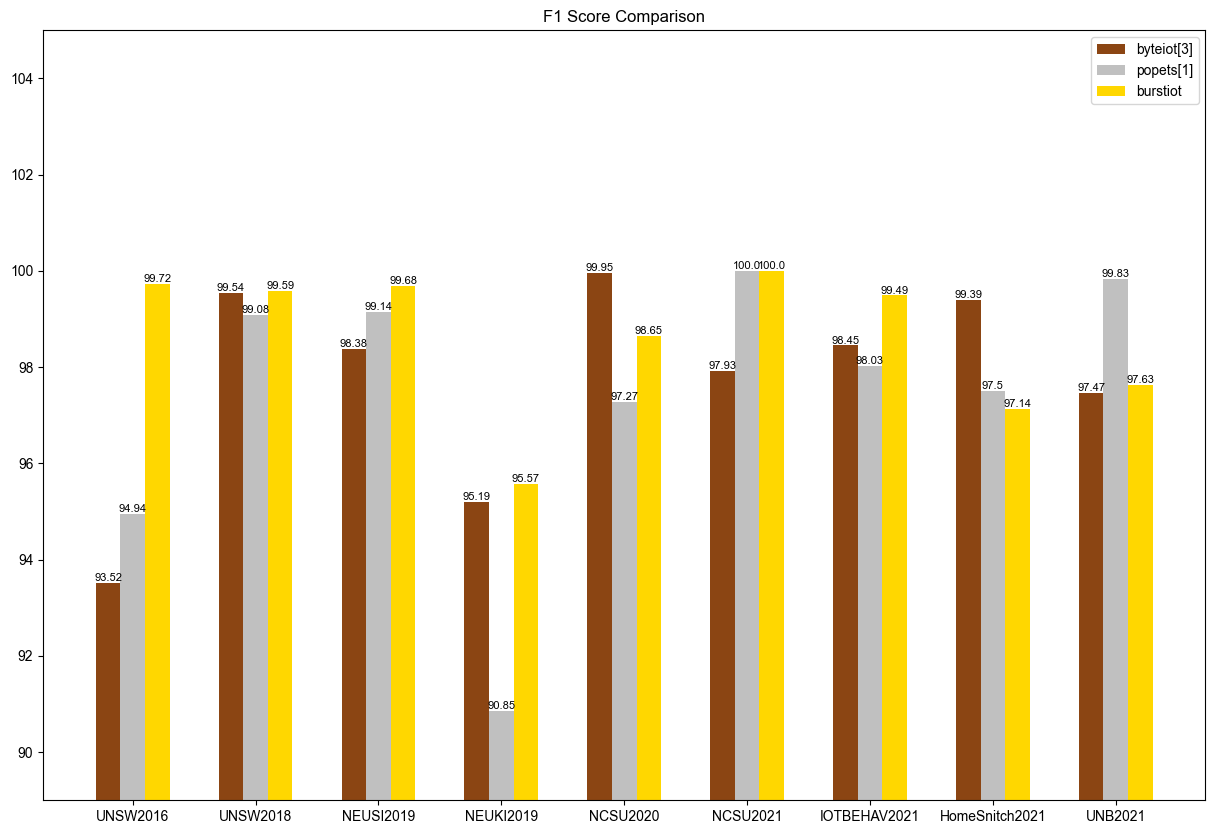

In [2]:
#库导入
from matplotlib import pyplot as plt
import numpy as np

def plot(results, dtlist):
    #参数设置
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['figure.figsize'] = (15,10)
    plt.ylim([89, 105])
    #国家和奖牌数据导入
    
    byteiot = [results['byteiot'][datasetName]['F1'] for datasetName in dtlist]
    popets  = [results['popets'][datasetName]['F1'] for datasetName in dtlist]
    burstiot = [results['burstiot'][datasetName]['F1'] for datasetName in dtlist]

    #将横坐标国家转换为数值
    x = np.arange(len(dtlist))
    width = 0.2

    #计算每一块的起始坐标
    byteiotX = x
    popetsX = x + width
    burstiotX = x + 2 * width

    #绘图
    plt.bar(byteiotX,byteiot,width=width,color="saddlebrown",label="byteiot[3]")
    plt.bar(popetsX,popets,width=width,color="silver",label="popets[1]")
    plt.bar(burstiotX,burstiot,width=width, color="gold",label="burstiot")

    #将横坐标数值转换为国家
    plt.xticks(x + width,labels=dtlist)

    #显示柱状图的高度文本
    for i in range(len(dtlist)):
        plt.text(byteiotX[i],byteiot[i], byteiot[i],va="bottom",ha="center",fontsize=8)
        plt.text(popetsX[i],popets[i], popets[i],va="bottom",ha="center",fontsize=8)
        plt.text(burstiotX[i],burstiot[i], burstiot[i],va="bottom",ha="center",fontsize=8)  

    #显示图例
    plt.legend(loc="upper right") 
    plt.title("F1 Score Comparison")

plot(results, datasetList)

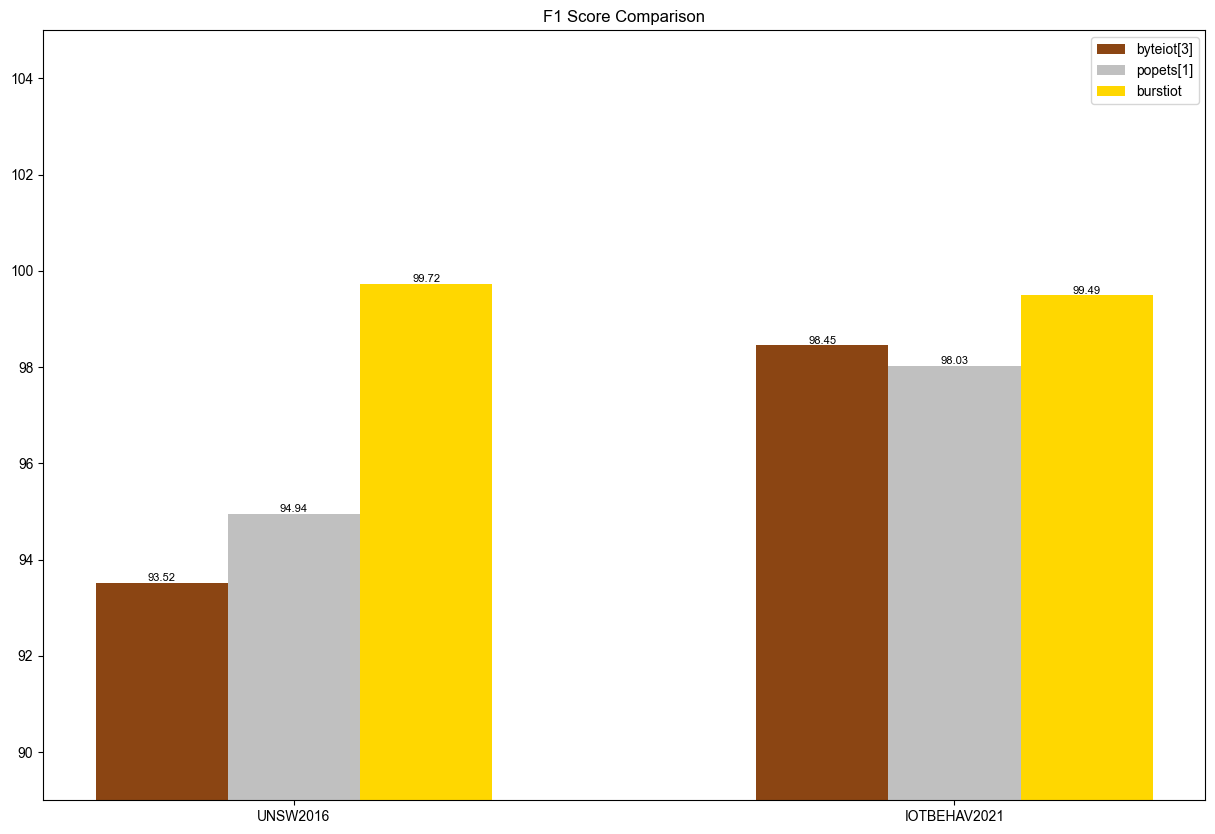

In [3]:
plot(results, datasetList1)

97.68 0
97.68 94.11999999999999
97.68 188.22166666666666


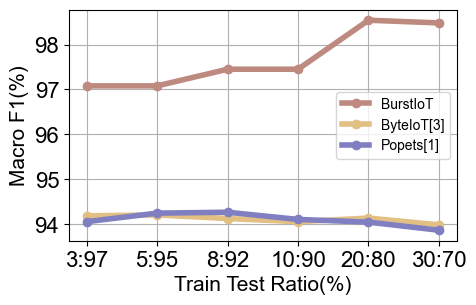

3.569166666666675
99.03833333333334 0
99.03833333333334 97.67166666666668
99.03833333333334 193.39500000000004


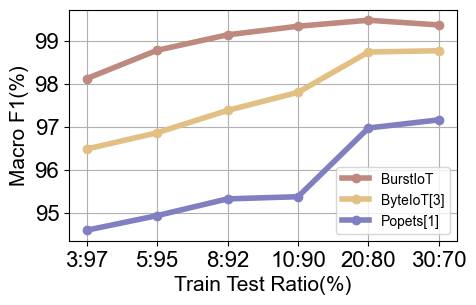

2.3408333333333218


In [4]:
import pandas as pd  
import matplotlib.pyplot as plt  

dfBurstIoT = pd.read_csv("E:/Thesis/BurstIoT/Comparision/result/burstiot-result-g.csv")
dfByteIoT = pd.read_csv("E:/Thesis/BurstIoT/Comparision/result/byteiot-result-g.csv")
dfPopets = pd.read_csv("E:/Thesis/BurstIoT/Comparision/result/popets-result-g.csv")

dfAll = pd.concat([dfBurstIoT, dfByteIoT, dfPopets])
dfAll.to_csv()
  
mcolors = ['#ff7ebb', '#ddcdcd', '#f4f0e5']
mcolors = ['#be8a7f', '#e2c083', '#807fc1']

otherVal = 0
burstIoTVal = 0

# 使用 color 和 label 参数来区分不同的 Method  
mapping = {'BurstIoT': 'BurstIoT', 'ByteIoT': 'ByteIoT[3]', 'Popets': 'Popets[1]'}
for datasetName in datasetList1:
    otherVal =0
    plt.figure(figsize=(5, 3))
    for method, color in zip(dfAll['Method'].unique(),  mcolors):  # 示例中使用了5种颜色，你可以根据需要调整  
        
        method_df = dfAll[(dfAll['Method'] == method) & (dfAll['DatasetName'] == datasetName)]
        
        plt.plot([0,1,2,3,4,5], method_df['F1'], marker='o', label=mapping[method], color=color, linewidth =4.0)  
        if method == "BurstIoT":
            burstIoTVal = method_df['F1'].sum()/len(method_df['F1'])
        else:
            otherVal += method_df['F1'].sum()/len(method_df['F1'])
        print(burstIoTVal,otherVal)
    #plt.title(f"{datasetName} F1 Score vs Sample Rate for Different Methods") 
    plt.xticks([0,1,2,3,4,5], ["3:97", "5:95", "8:92", "10:90", "20:80", "30:70"])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
   
    plt.xlabel('Train Test Ratio(%)',fontdict={'size': 15})  
    plt.ylabel('Macro F1(%)',fontdict={'size': 15})  
    plt.legend()  
    plt.grid(True)  
    plt.savefig(f"E:/Thesis/BurstIoT/Comparision/result/f1-{datasetName}.png",bbox_inches = 'tight')
    plt.show()

    print(burstIoTVal - otherVal/2)
    

# 绘制耗时图
横坐标是采样率，纵坐标是总耗时的时间（log10）


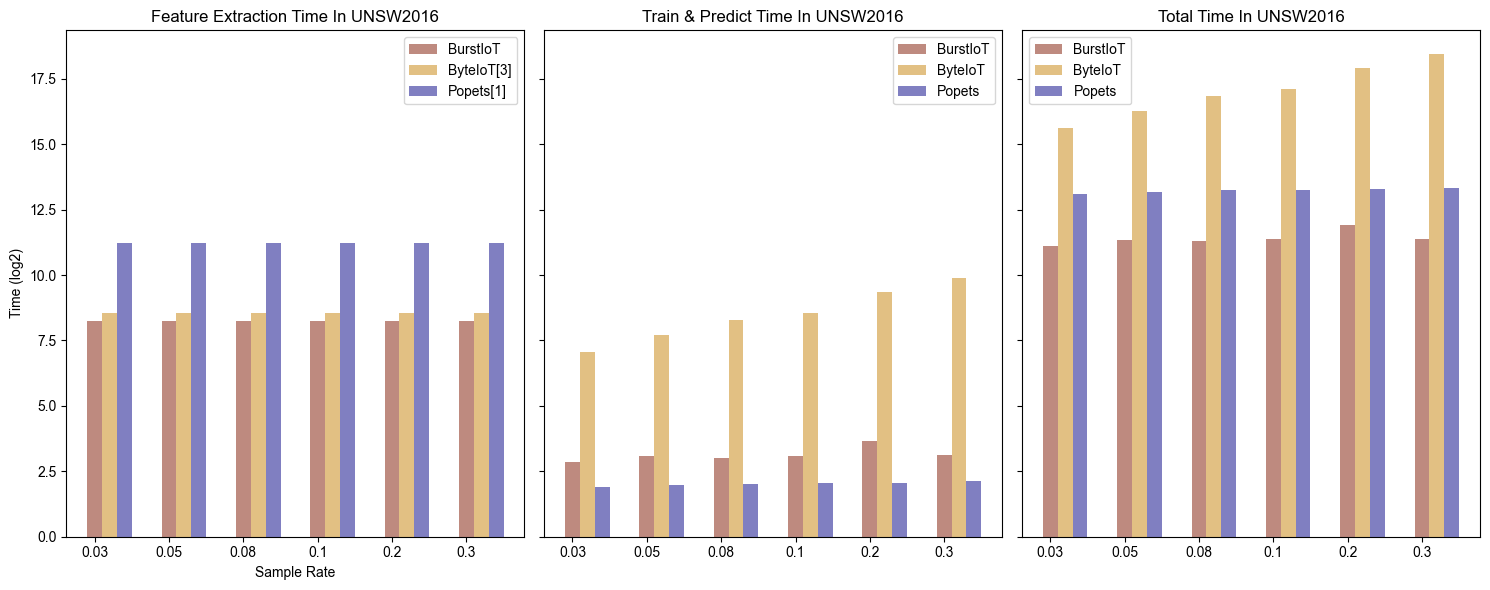

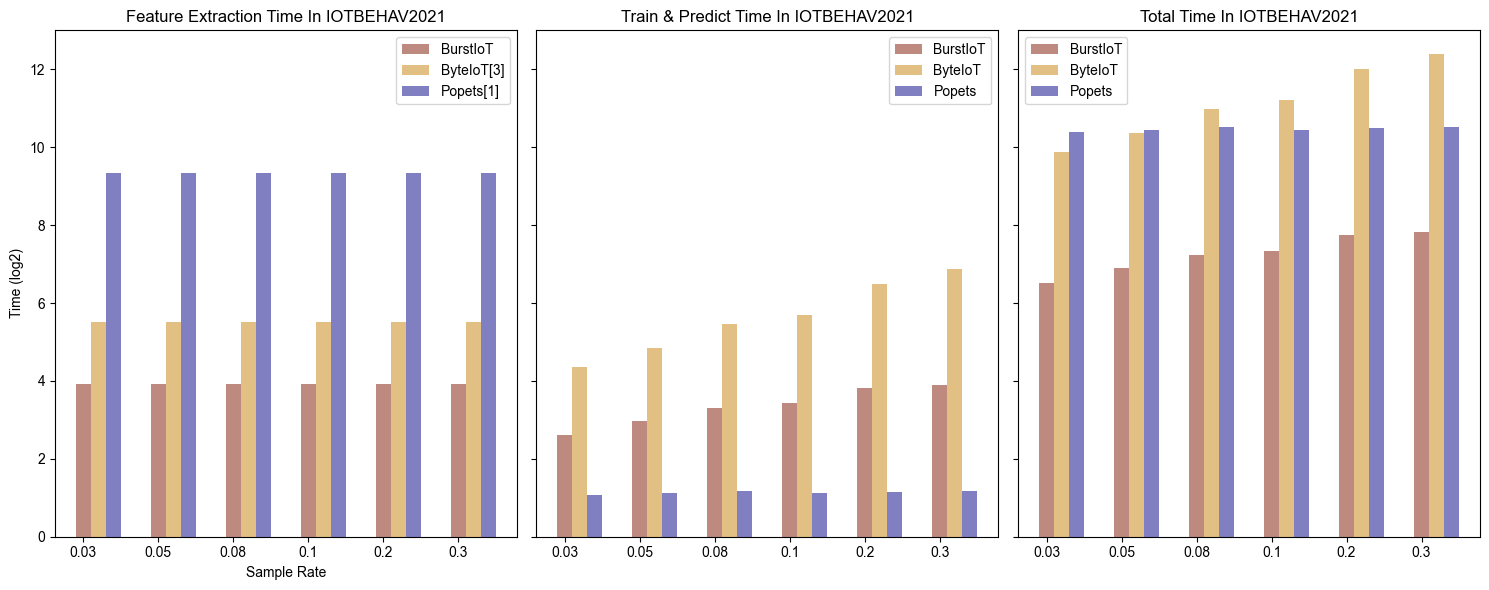

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math

mcolors = ['#ff7ebb', '#ddcdcd', '#f4f0e5']
mcolors = ['#be8a7f', '#e2c083', '#807fc1']

# Dataset names and methods

df = pd.read_csv("E:/Thesis/BurstIoT/Comparision/result/result-all-g.csv")

datasets = df['DatasetName'].unique()
methods = df['Method'].unique()

# Bar width
bar_width = 0.2

for dataset in datasetList1:
    # Create subplots for Tshark, Feature Extraction, and TrainPredict
    fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
    
    ax[0].set_ylabel('Time (log2)')
    ax[0].set_xlabel('Sample Rate')

    # Plot Feature Extraction times
    sampleRates = [0.03, 0.05, 0.08, 0.1, 0.2, 0.3]
    x = np.arange(6)

    fextractionTimesBurstIoT = np.array([math.log2(df[(df['DatasetName'] == dataset) & (df['Method'] == 'BurstIoT') &(df['SampleRate'] == sampleRate)]['Feature Extraction'].values[0]) for sampleRate in sampleRates])
    fextractionTimesByteiot = np.array([ math.log2(df[(df['DatasetName'] == dataset) & (df['Method'] == 'ByteIoT') &(df['SampleRate'] == sampleRate)]['Feature Extraction'].values[0]) for sampleRate in sampleRates])
    fextractionTimesPopets = np.array([ math.log2(df[(df['DatasetName'] == dataset) & (df['Method'] == 'Popets') &(df['SampleRate'] == sampleRate)]['Feature Extraction'].values[0]) for sampleRate in sampleRates])

    ax[0].bar(x, fextractionTimesBurstIoT, bar_width, label='BurstIoT',color=mcolors[0])
    ax[0].bar(x + bar_width, fextractionTimesByteiot, bar_width, label='ByteIoT[3]',color=mcolors[1])
    ax[0].bar(x + 2*bar_width, fextractionTimesPopets, bar_width, label='Popets[1]',color=mcolors[2])

    ax[0].set_title(f"Feature Extraction Time In {dataset}")
    ax[0].set_xticks(x)
    ax[0].set_xticklabels(sampleRates)
    ax[0].legend()

    # Plot TrainPredict times

    trainPredictTimesBurstIoT = np.array([math.log2(df[(df['DatasetName'] == dataset) & (df['Method'] == 'BurstIoT') &(df['SampleRate'] == sampleRate)]['TrainPredict'].values[0]) for sampleRate in sampleRates])
    trainPredictTimesByteiot =  np.array([math.log2(df[(df['DatasetName'] == dataset) & (df['Method'] == 'ByteIoT') &(df['SampleRate'] == sampleRate)]['TrainPredict'].values[0]) for sampleRate in sampleRates])
    trainPredictTimesPopets =   np.array([math.log2(df[(df['DatasetName'] == dataset) & (df['Method'] == 'Popets') &(df['SampleRate'] == sampleRate)]['TrainPredict'].values[0]) for sampleRate in sampleRates])

    ax[1].bar(x , trainPredictTimesBurstIoT, bar_width, label='BurstIoT',color=mcolors[0])
    ax[1].bar(x + bar_width, trainPredictTimesByteiot, bar_width, label='ByteIoT',color=mcolors[1])
    ax[1].bar(x + 2*bar_width, trainPredictTimesPopets, bar_width, label='Popets',color=mcolors[2])

    ax[1].set_title(f"Train & Predict Time In {dataset}")
    ax[1].set_xticks(x)
    ax[1].set_xticklabels(sampleRates)
    ax[1].legend()

    # Plot Total time

    totalTimesBurstIoT = fextractionTimesBurstIoT+trainPredictTimesBurstIoT
    totalTimesByteiot = fextractionTimesByteiot+trainPredictTimesByteiot
    totalTimesPopets = fextractionTimesPopets+trainPredictTimesPopets

    ax[2].bar(x , totalTimesBurstIoT, bar_width, label='BurstIoT',color=mcolors[0])
    ax[2].bar(x + bar_width, totalTimesByteiot, bar_width, label='ByteIoT',color=mcolors[1])
    ax[2].bar(x + 2*bar_width, totalTimesPopets, bar_width, label='Popets',color=mcolors[2])

    ax[2].set_title(f"Total Time In {dataset}")
    ax[2].set_xticks(x)
    ax[2].set_xticklabels(sampleRates)
    ax[2].legend()

    # Show plot
    plt.tight_layout()
    plt.show()



# 直接绘制0.1sampleRate的时候
横坐标是fe/trainp/total
纵坐标是时间

In [6]:
sampleRate = 0.1

def getFeTime(df, dataset, sampleRate, method):
    return (df[(df['DatasetName'] == dataset) & (df['Method'] == method) & (df['SampleRate'] == sampleRate)]['Feature Extraction'].values[0])

def getTrainPredictTime(df, dataset, sampleRate, method):
    return (df[(df['DatasetName'] == dataset) & (df['Method'] == method) & (df['SampleRate'] == sampleRate)]['TrainPredict'].values[0])

def getTotalTime(df, dataset, sampleRate, method):
    return getFeTime(df, dataset, sampleRate, method) + getTrainPredictTime(df, dataset, sampleRate, method)


fextractionTimesBurstIoT = getFeTime(df, dataset, sampleRate, 'BurstIoT')
fextractionTimesByteiot = getFeTime(df, dataset, sampleRate, 'ByteIoT')
fextractionTimesPopets = getFeTime(df, dataset, sampleRate, 'Popets')

trainPredictTimesBurstIoT = getTrainPredictTime(df, dataset, sampleRate, 'BurstIoT')
trainPredictTimesByteiot = getTrainPredictTime(df, dataset, sampleRate, 'ByteIoT')
trainPredictTimesPopets = getTrainPredictTime(df, dataset, sampleRate, 'Popets')

totalTimesBurstIoT = getTotalTime(df, dataset, sampleRate, 'BurstIoT')
totalTimesByteiot = getTotalTime(df, dataset, sampleRate, 'ByteIoT')
totalTimesPopets = getTotalTime(df, dataset, sampleRate, 'Popets')


0
UNSW2016
1
IOTBEHAV2021


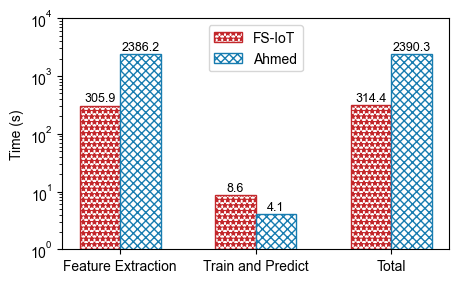

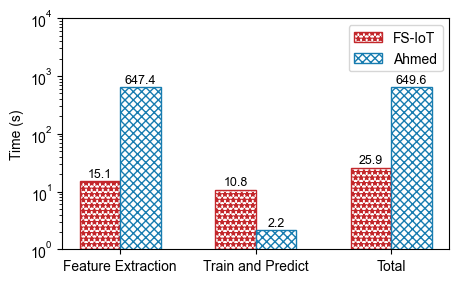

Average vs ByteIoT: 116.6%
Average vs Popets: 5.7%


In [9]:
av1=0
av2=0
for index, datasetName in enumerate(datasetList1):
    plt.figure(figsize=(5, 3))
    print(index)
    print(datasetName)

    fextractionTimesBurstIoT = getFeTime(df, datasetName, sampleRate, 'BurstIoT')
    fextractionTimesPopets = getFeTime(df, datasetName, sampleRate, 'Popets')
    trainPredictTimesBurstIoT = getTrainPredictTime(df, datasetName, sampleRate, 'BurstIoT')
    trainPredictTimesPopets = getTrainPredictTime(df, datasetName, sampleRate, 'Popets')
    totalTimesBurstIoT = getTotalTime(df, datasetName, sampleRate, 'BurstIoT')
    totalTimesPopets = getTotalTime(df, datasetName, sampleRate, 'Popets')
    
    # 计算平均值（假设这部分正确）
    av1 += (totalTimesBurstIoT) / totalTimesByteiot * 100
    av2 += (totalTimesBurstIoT) / totalTimesPopets * 100

    # 绘制柱状图
    x = np.arange(3)
    bar_width = 0.3  # 适当增加宽度以提高可读性

    # 绘制柱状图并保存对象
    burst_bars = plt.bar(x - bar_width/2, 
                         [fextractionTimesBurstIoT, trainPredictTimesBurstIoT, totalTimesBurstIoT], 
                         bar_width, label='FS-IoT', color="#ffffff",  hatch='***', edgecolor="#c3272b")
    popets_bars = plt.bar(x + bar_width/2, 
                         [fextractionTimesPopets, trainPredictTimesPopets, totalTimesPopets], 
                         bar_width, label='Ahmed', color="#ffffff", hatch='xxxx', edgecolor="#177cb0")

    # 添加数值标签
    for bars in [burst_bars, popets_bars]:
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, 
                     height * 1.05,  # 提高标签位置
                     f'{height:.1f}',  # 保留一位小数
                     ha='center', 
                     va='bottom',
                     fontsize=9)

    # 设置对数尺度
    plt.yscale('log')
    plt.ylim([1, 10000])  
    plt.xticks(x, ["Feature Extraction", "Train and Predict", "Total"], fontsize=10)
    plt.ylabel('Time (s)', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend()

    # 保存和显示
    plt.savefig(f"E:/Thesis/BurstIoT/Comparision/result/overhead-{datasetName}.pdf", bbox_inches='tight')
    
plt.show()

print(f"Average vs ByteIoT: {av1/3:.1f}%")
print(f"Average vs Popets: {av2/3:.1f}%")

0
UNSW2016
1
IOTBEHAV2021


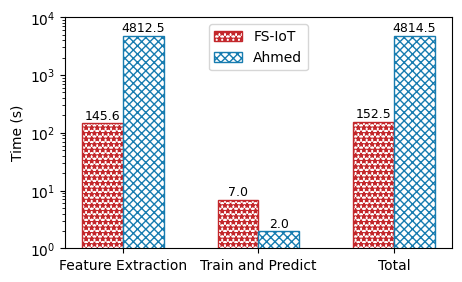

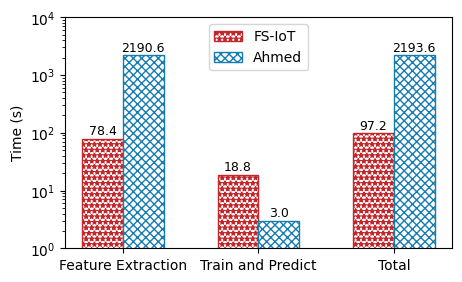

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

unswFSFE = 145.56
unswFSTP = 6.96
unswFSTT = unswFSFE + unswFSTP

unswAHFE = 4812.53
unswAHTP = 1.97
unswAHTT = unswAHFE + unswAHTP

bhvFSFE = 78.40
bhvFSTP = 18.80
bhvFSTT = bhvFSFE + bhvFSTP

bhvAHFE = 2190.57
bhvAHTP = 2.98
bhvAHTT = bhvAHFE + bhvAHTP

datasetList1 = ['UNSW2016', 'IOTBEHAV2021']

for index, datasetName in enumerate(datasetList1):
    plt.figure(figsize=(5, 3))
    print(index)
    print(datasetName)

    fextractionTimesBurstIoT = unswFSFE if datasetName == 'UNSW2016' else bhvFSFE
    fextractionTimesPopets = unswAHFE if datasetName == 'UNSW2016' else bhvAHFE
    trainPredictTimesBurstIoT = unswFSTP if datasetName == 'UNSW2016' else bhvFSTP
    trainPredictTimesPopets = unswAHTP if datasetName == 'UNSW2016' else bhvAHTP
    totalTimesBurstIoT = unswFSTT if datasetName == 'UNSW2016' else bhvFSTT
    totalTimesPopets = unswAHTT if datasetName == 'UNSW2016' else bhvAHTT
    
    # 计算平均值（假设这部分正确）

    # 绘制柱状图
    x = np.arange(3)
    bar_width = 0.3  # 适当增加宽度以提高可读性

    # 绘制柱状图并保存对象
    burst_bars = plt.bar(x - bar_width/2, 
                         [fextractionTimesBurstIoT, trainPredictTimesBurstIoT, totalTimesBurstIoT], 
                         bar_width, label='FS-IoT', color="#ffffff",  hatch='***', edgecolor="#c3272b")
    popets_bars = plt.bar(x + bar_width/2, 
                         [fextractionTimesPopets, trainPredictTimesPopets, totalTimesPopets], 
                         bar_width, label='Ahmed', color="#ffffff", hatch='xxxx', edgecolor="#177cb0")

    # 添加数值标签
    for bars in [burst_bars, popets_bars]:
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, 
                     height * 1.05,  # 提高标签位置
                     f'{height:.1f}',  # 保留一位小数
                     ha='center', 
                     va='bottom',
                     fontsize=9)

    # 设置对数尺度
    plt.yscale('log')
    plt.ylim([1, 10000])  
    plt.xticks(x, ["Feature Extraction", "Train and Predict", "Total"], fontsize=10)
    plt.ylabel('Time (s)', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend()

    # 保存和显示
    plt.savefig(f"E:/Thesis/BurstIoT/Comparision/result/overhead-{datasetName}.pdf", bbox_inches='tight')

    # plt.savefig(f"/media/kunling/BigE/Thesis/BurstIoT/Comparision/result/overhead-{datasetName}.pdf", bbox_inches='tight')
    
plt.show()



0
UNSW2016
314.45
97.28999999999999
2390.34
1
IOTBEHAV2021
25.88
97.28999999999999
649.5899999999999


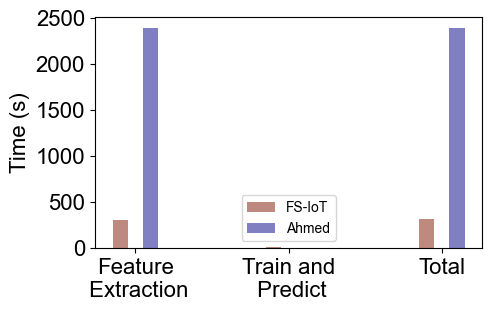

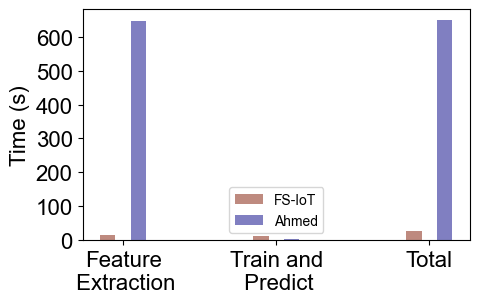

116.60328228320827 %
5.713027939040253 %


In [8]:
#fig, ax = plt.subplots(1, 3, figsize=(15, 6))

av1=0
av2=0
for index, datasetName in enumerate(datasetList1):
    plt.figure(figsize=(5, 3))
    print(index)
    print(datasetName)
    fextractionTimesBurstIoT = getFeTime(df, datasetName, sampleRate, 'BurstIoT')
    # fextractionTimesByteiot = getFeTime(df, datasetName, sampleRate, 'ByteIoT')
    fextractionTimesPopets = getFeTime(df, datasetName, sampleRate, 'Popets')

    trainPredictTimesBurstIoT = getTrainPredictTime(df, datasetName, sampleRate, 'BurstIoT')
    # trainPredictTimesByteiot = getTrainPredictTime(df, datasetName, sampleRate, 'ByteIoT')
    trainPredictTimesPopets = getTrainPredictTime(df, datasetName, sampleRate, 'Popets')

    totalTimesBurstIoT = getTotalTime(df, datasetName, sampleRate, 'BurstIoT')
    # totalTimesByteiot = getTotalTime(df, datasetName, sampleRate, 'ByteIoT')
    totalTimesPopets = getTotalTime(df, datasetName, sampleRate, 'Popets')

    print(totalTimesBurstIoT)
    print(totalTimesByteiot)
    print(totalTimesPopets)
    av1 +=( totalTimesBurstIoT)/ totalTimesByteiot*100
    av2 +=( totalTimesBurstIoT)/ totalTimesPopets*100

    ax[0].set_ylabel('Time (s)')

    x = np.arange(3)
    bar_width = 0.1

    plt.bar(x-bar_width , [fextractionTimesBurstIoT, trainPredictTimesBurstIoT,totalTimesBurstIoT], bar_width, label='FS-IoT',color=mcolors[0])
    # plt.bar(x, [fextractionTimesByteiot, trainPredictTimesByteiot,totalTimesByteiot], bar_width, label='ByteIoT',color=mcolors[1])
    plt.bar(x + bar_width, [fextractionTimesPopets, trainPredictTimesPopets,totalTimesPopets], bar_width, label='Ahmed',color=mcolors[2])
    plt.xticks(x,["Feature\n Extraction", "Train and\n Predict", "Total"],fontsize=16)
    plt.ylabel('Time (s)',fontdict={'size': 16})  
    plt.yticks(fontsize=16)
   

    #plt.title(f"In {datasetName}")
    plt.legend()
    plt.savefig(f"E:/Thesis/BurstIoT/Comparision/result/overhead-{datasetName}.png",bbox_inches = 'tight')
plt.show()

print(av1/3, "%")
print(av2/3, "%")